<a href="https://colab.research.google.com/github/estistern/Capstone/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
cancer_data = pd.read_csv('global_cancer_patients_2015_2024.csv')

In [ ]:
# View first 5 rows of data
cancer_data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [ ]:
# Check for nulls and data types
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
# Check for duplicate rows
duplicates = cancer_data.duplicated()
cancer_data[duplicates]

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score


In [ ]:
# Summary statistics
cancer_data.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


/tmp/ipython-input-10-3170202251.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cancer_data[col] for col in columns], labels=columns)


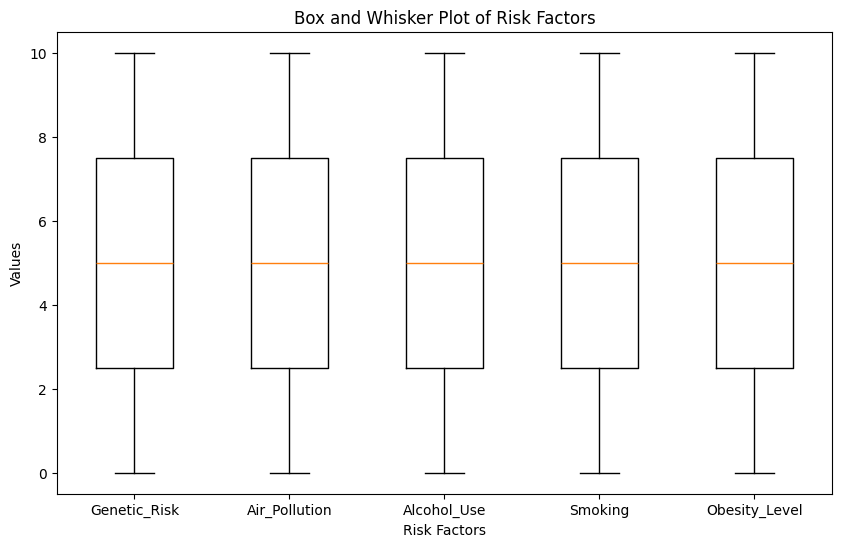

In [ ]:
# Selecting Risk Factor columns
columns = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

# Box and Whisker plot of Risk Factors
plt.figure(figsize=(10, 6))
plt.boxplot([cancer_data[col] for col in columns], labels=columns)
plt.xlabel('Risk Factors')
plt.ylabel('Values')
plt.title('Box and Whisker Plot of Risk Factors')
plt.show()

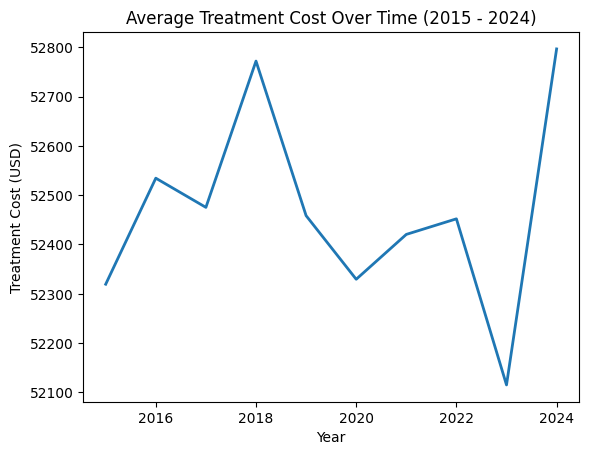

In [ ]:
# Calculate the average Treatment Cost by Year
avg_cost_by_year = cancer_data.groupby('Year')['Treatment_Cost_USD'].mean()

# Line graph of Average Treatment Cost over Time
plt.plot(avg_cost_by_year.index, avg_cost_by_year.values, linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost Over Time (2015 - 2024)')
plt.show()

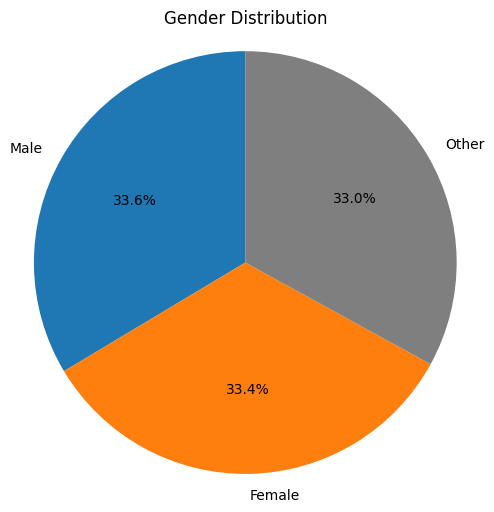

In [ ]:
# Count occurrences of each gender
gender_counts = cancer_data['Gender'].value_counts().sort_values(ascending=False)

# Calculate percentages
total = gender_counts.sum()
percentages = (gender_counts / total) * 100

# Pie chart of Gender
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['C0', 'C1', 'C7'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

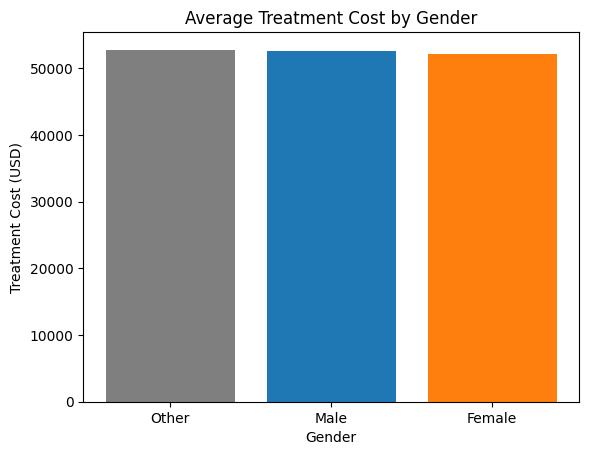

In [ ]:
# Calculate the average Treatment Cost by Gender
avg_cost_by_gender = cancer_data.groupby('Gender')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Gender
avg_cost_by_gender = avg_cost_by_gender.sort_values(ascending=False) # sort in descending order
plt.bar(avg_cost_by_gender.index, avg_cost_by_gender.values, color=['C7', 'C0', 'C1'])
plt.xlabel('Gender')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Gender')
plt.show()

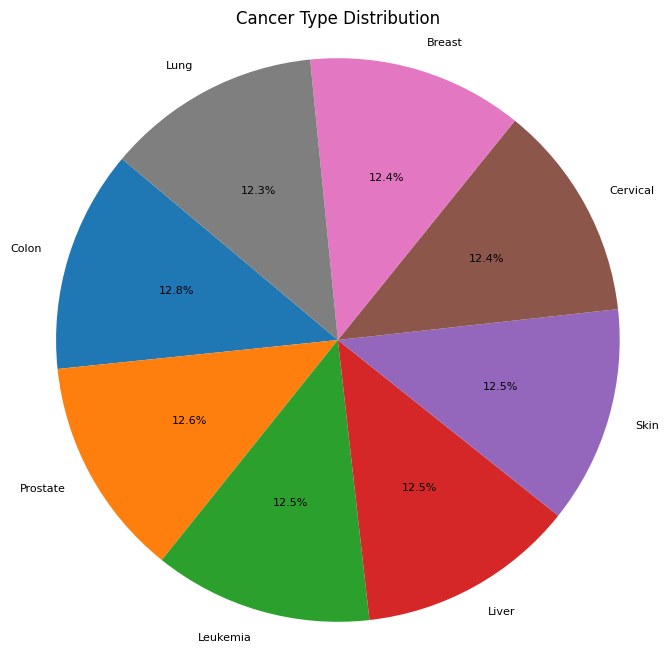

In [ ]:
# Count occurrences of each cancer type
cancer_type_counts = cancer_data['Cancer_Type'].value_counts().sort_values(ascending=False)

# Calculate percentages
total = cancer_type_counts.sum()
percentages = (cancer_type_counts / total) * 100

# Pie chart of Cancer Type
plt.figure(figsize=(8, 8))
plt.pie(
    cancer_type_counts.values,
    labels=cancer_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Cancer Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

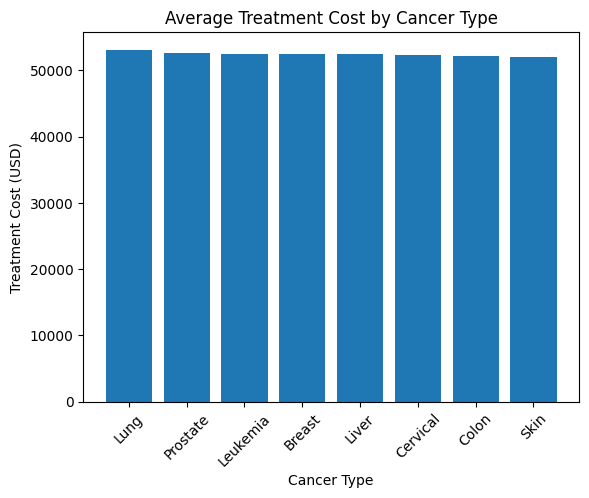

In [ ]:
# Calculate the average Treatment Cost by Cancer Type
avg_cost_by_type = cancer_data.groupby('Cancer_Type')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Cancer Type
avg_cost_by_type = avg_cost_by_type.sort_values(ascending=False) # sort in descending order
plt.bar(avg_cost_by_type.index, avg_cost_by_type.values)
plt.xlabel('Cancer Type')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Cancer Type')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

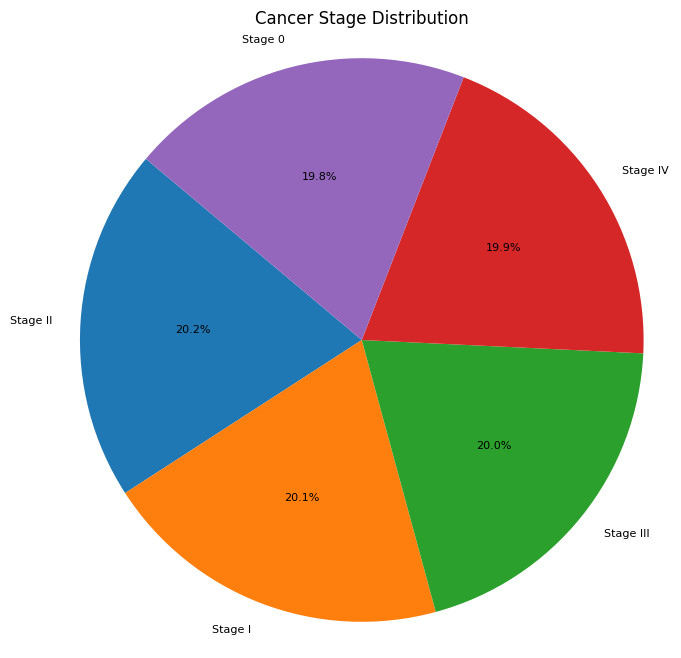

In [ ]:
# Count occurrences of each cancer stage
cancer_stage_counts = cancer_data['Cancer_Stage'].value_counts().sort_values(ascending=False)

# Calculate percentages
total = cancer_stage_counts.sum()
percentages = (cancer_stage_counts / total) * 100

# Pie chart of Cancer Stage
plt.figure(figsize=(8, 8))
plt.pie(
    cancer_stage_counts.values,
    labels=cancer_stage_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Cancer Stage Distribution')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()

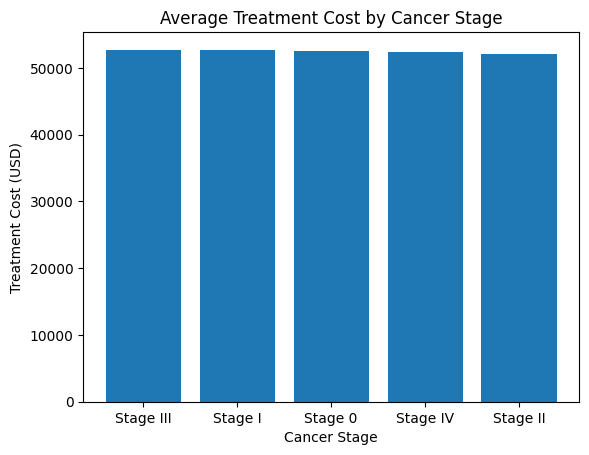

In [ ]:
# Calculate the average Treatment Cost by Cancer Stage
avg_cost_by_stage = cancer_data.groupby('Cancer_Stage')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Cancer Stage
avg_cost_by_stage = avg_cost_by_stage.sort_values(ascending=False) # sort in descending order
plt.bar(avg_cost_by_stage.index, avg_cost_by_stage.values)
plt.xlabel('Cancer Stage')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Cancer Stage')
plt.show()

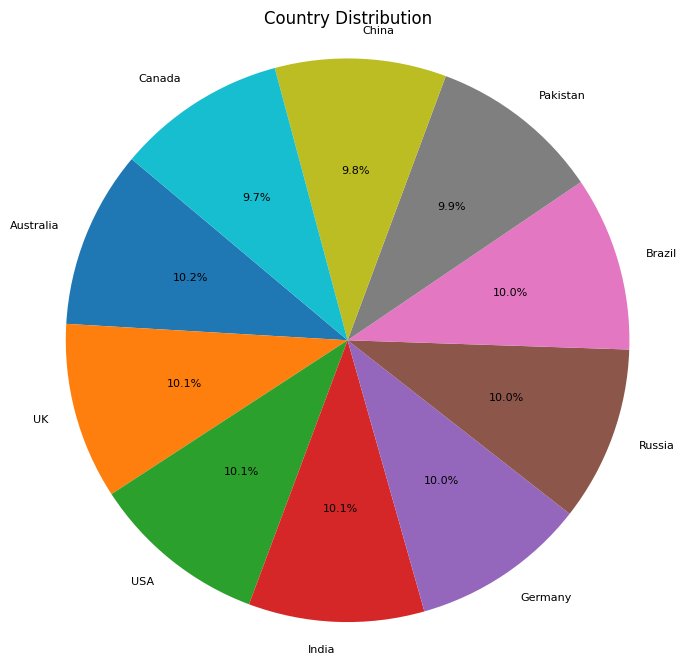

In [ ]:
# Count occurrences of each country
country_counts = cancer_data['Country_Region'].value_counts().sort_values(ascending=False)

# Calculate percentages
total = country_counts.sum()
percentages = (country_counts / total) * 100

# Pie chart of Country Distribution
plt.figure(figsize=(8, 8))
plt.pie(
    country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 8}
)
plt.title('Country Distribution')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()

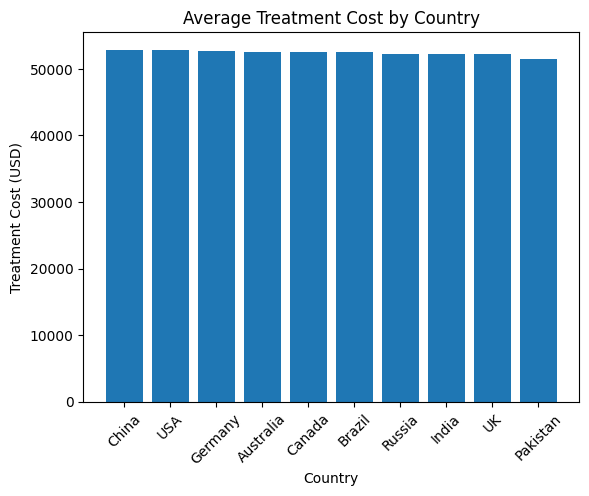

In [ ]:
# Calculate the average Treatment Cost by Country
avg_cost_by_country = cancer_data.groupby('Country_Region')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Country
avg_cost_by_country = avg_cost_by_country.sort_values(ascending=False) # sort in descending order
plt.bar(avg_cost_by_country.index, avg_cost_by_country.values)
plt.xlabel('Country')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Country')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

/tmp/ipython-input-19-943310677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Region', y='country_score', data=country_mean, palette='coolwarm')


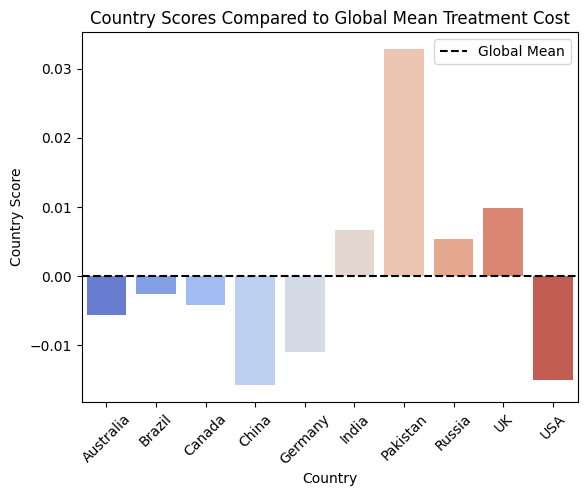

In [ ]:
# Calculate global mean and stand deviation of Treatment Cost
global_mean = cancer_data['Treatment_Cost_USD'].mean()
global_std = cancer_data['Treatment_Cost_USD'].std()

# Calculate mean Treatment Cost per Country
country_mean = cancer_data.groupby('Country_Region')['Treatment_Cost_USD'].mean().reset_index()

# Compute score for each Country
country_mean['country_score'] = (global_mean - country_mean['Treatment_Cost_USD'])/global_std

# Plot the scores compared to the global mean
sns.barplot(x='Country_Region', y='country_score', data=country_mean, palette='coolwarm')
plt.axhline(y=0, color='black', linestyle='--', label='Global Mean') # horizontal line at y=0
plt.xticks(rotation=45) # Rotate labels by 45 degrees
plt.ylabel('Country Score')
plt.xlabel('Country')
plt.title('Country Scores Compared to Global Mean Treatment Cost')
plt.legend()
plt.show()

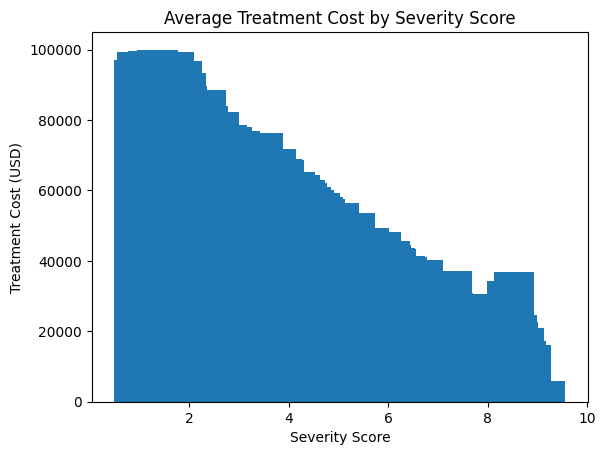

In [ ]:
# Calculate the average Treatment Cost by Target Severity Score
avg_cost_by_severity = cancer_data.groupby('Target_Severity_Score')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Target Severity Score
plt.bar(avg_cost_by_severity.index, avg_cost_by_severity.values)
plt.xlabel('Severity Score')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Severity Score')
plt.show()

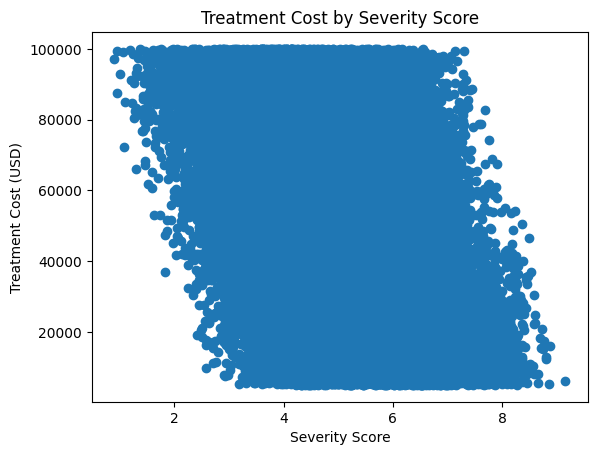

In [ ]:
# Scatter plot of Treatment Cost by Severity Score
plt.scatter(cancer_data['Target_Severity_Score'], cancer_data['Treatment_Cost_USD'])
plt.xlabel('Severity Score')
plt.ylabel('Treatment Cost (USD)')
plt.title('Treatment Cost by Severity Score')
plt.show()

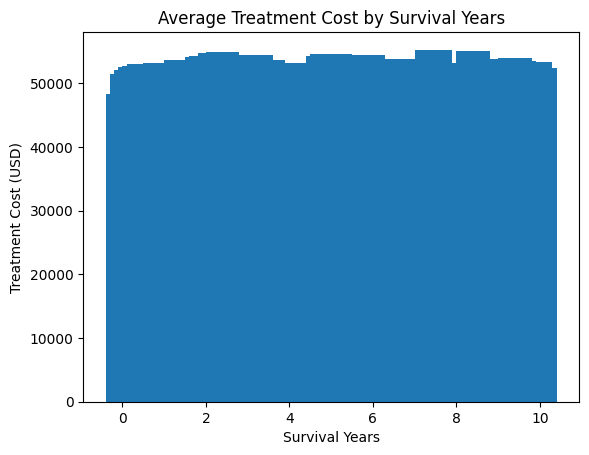

In [ ]:
# Calculate the average Treatment Cost by Survival Years
avg_cost_by_survival = cancer_data.groupby('Survival_Years')['Treatment_Cost_USD'].mean()

# Bar chart of Average Treatment Cost by Survival Years
plt.bar(avg_cost_by_survival.index, avg_cost_by_survival.values)
plt.xlabel('Survival Years')
plt.ylabel('Treatment Cost (USD)')
plt.title('Average Treatment Cost by Survival Years')
plt.show()

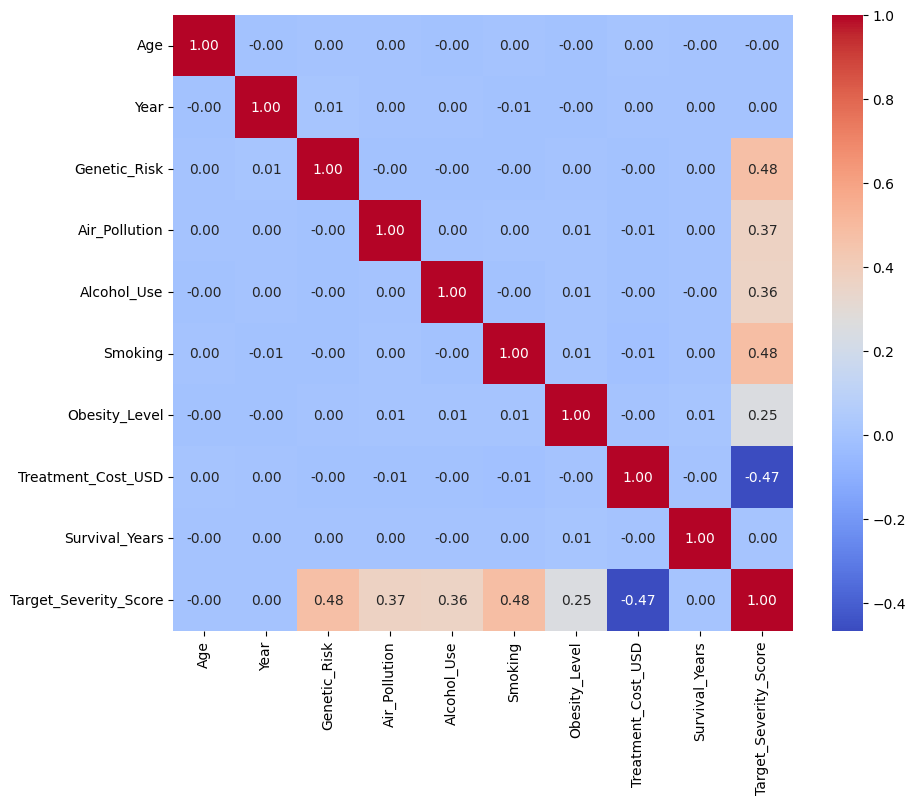

In [ ]:
# Correlation heatmap of all numeric data
corr_matrix = cancer_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# Correlation values specifically with Treatment Cost
print(corr_matrix["Treatment_Cost_USD"].sort_values(ascending=False))

Treatment_Cost_USD       1.000000
Age                      0.003591
Year                     0.000061
Survival_Years          -0.000429
Obesity_Level           -0.001251
Genetic_Risk            -0.002365
Alcohol_Use             -0.003608
Air_Pollution           -0.007566
Smoking                 -0.009169
Target_Severity_Score   -0.466058
Name: Treatment_Cost_USD, dtype: float64
